In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv("C:/Users/dexter/Desktop/nlightn/data.csv")

In [3]:
df.head()


,date,p1,ch1,ch2,ch2.1,ch3,ch4,ch5,ch6,c1,c2,c3,c4,c5,y
0,2016-01-03,1598,0,1678,0,0,0,0,0,0,0,0,1678,0,1678
1,2016-01-06,1700,0,4590,0,0,0,0,799,839,1120,840,2060,530,5389
2,2016-01-09,0,0,0,0,0,900,0,0,100,0,800,0,0,900
3,2016-01-11,4250,0,0,0,0,0,0,6410,2580,340,80,1730,1680,6410
4,2016-01-14,8374,0,0,8754,0,0,0,0,940,520,3196,4018,80,8754


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p1,538.0,25126.907063,17616.450104,0.0,15183.00,22336.5,30923.00,168300.0
ch1,538.0,6645.977695,7401.470156,0.0,2884.00,5992.5,8820.50,136474.0
ch2,538.0,8613.667286,19354.820564,0.0,3049.50,6263.5,9941.25,282511.0
ch2.1,538.0,6504.306691,7708.536626,0.0,2605.00,5552.0,8919.25,146828.0
ch3,538.0,6987.256506,9922.817967,0.0,2977.00,5672.5,9163.00,152624.0
ch4,538.0,7134.877323,11225.400536,0.0,3062.25,5682.0,9091.50,154076.0
ch5,538.0,6505.552045,6937.360012,0.0,2530.00,5907.5,8916.00,123774.0
ch6,538.0,8599.936803,17165.682352,0.0,3242.50,6433.0,9911.75,182313.0
c1,538.0,10218.189591,8178.793451,0.0,5377.00,8951.5,13282.25,80994.0
c2,538.0,10426.013011,8665.714597,0.0,4948.00,9187.0,13519.75,75603.0


In [5]:
df.isnull().sum()

date     0
p1       0
ch1      0
ch2      0
ch2.1    0
ch3      0
ch4      0
ch5      0
ch6      0
c1       0
c2       0
c3       0
c4       0
c5       0
y        0
dtype: int64

In [6]:
df["day"]= df["date"].apply(lambda x: int(x.split("-")[-1]))
df["month"]= df["date"].apply(lambda x: int(x.split("-")[-2]))
df["year"]= df["date"].apply(lambda x: int(x.split("-")[-3]))


In [7]:
del df["date"]

In [8]:
df.head()

,p1,ch1,ch2,ch2.1,ch3,ch4,ch5,ch6,c1,c2,c3,c4,c5,y,day,month,year
0,1598,0,1678,0,0,0,0,0,0,0,0,1678,0,1678,3,1,2016
1,1700,0,4590,0,0,0,0,799,839,1120,840,2060,530,5389,6,1,2016
2,0,0,0,0,0,900,0,0,100,0,800,0,0,900,9,1,2016
3,4250,0,0,0,0,0,0,6410,2580,340,80,1730,1680,6410,11,1,2016
4,8374,0,0,8754,0,0,0,0,940,520,3196,4018,80,8754,14,1,2016


In [9]:
df= df[["p1","ch1","ch2","ch2.1","ch3","ch4","ch5","ch6","c1","c2","c3","c4","c5","day","month","year","y"]]
df.dtypes

p1       int64
ch1      int64
ch2      int64
ch2.1    int64
ch3      int64
ch4      int64
ch5      int64
ch6      int64
c1       int64
c2       int64
c3       int64
c4       int64
c5       int64
day      int64
month    int64
year     int64
y        int64
dtype: object

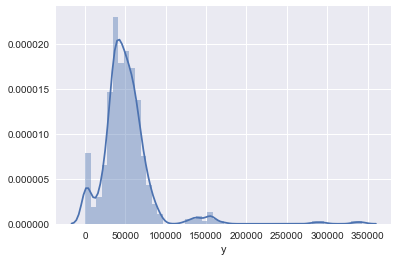

In [10]:
import seaborn as sns
%matplotlib inline
#histogram
sns.distplot(df['y'])

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df['y'].skew())
print("Kurtosis: %f" % df['y'].kurt())


Skewness: 3.929131
Kurtosis: 26.533455


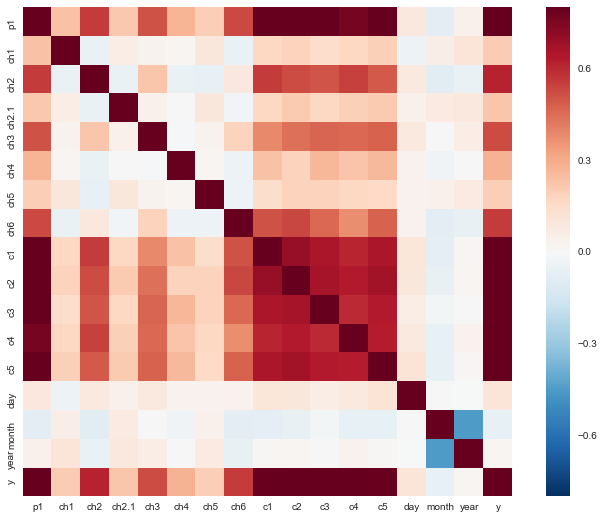

In [12]:
import matplotlib.pyplot as plt
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

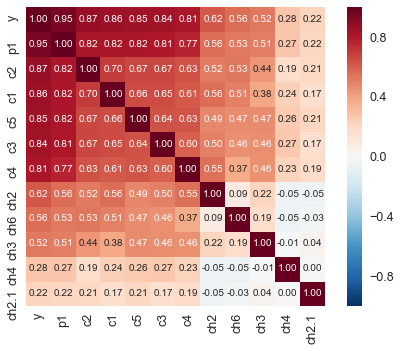

In [13]:
import numpy as np
#saleprice correlation matrix
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

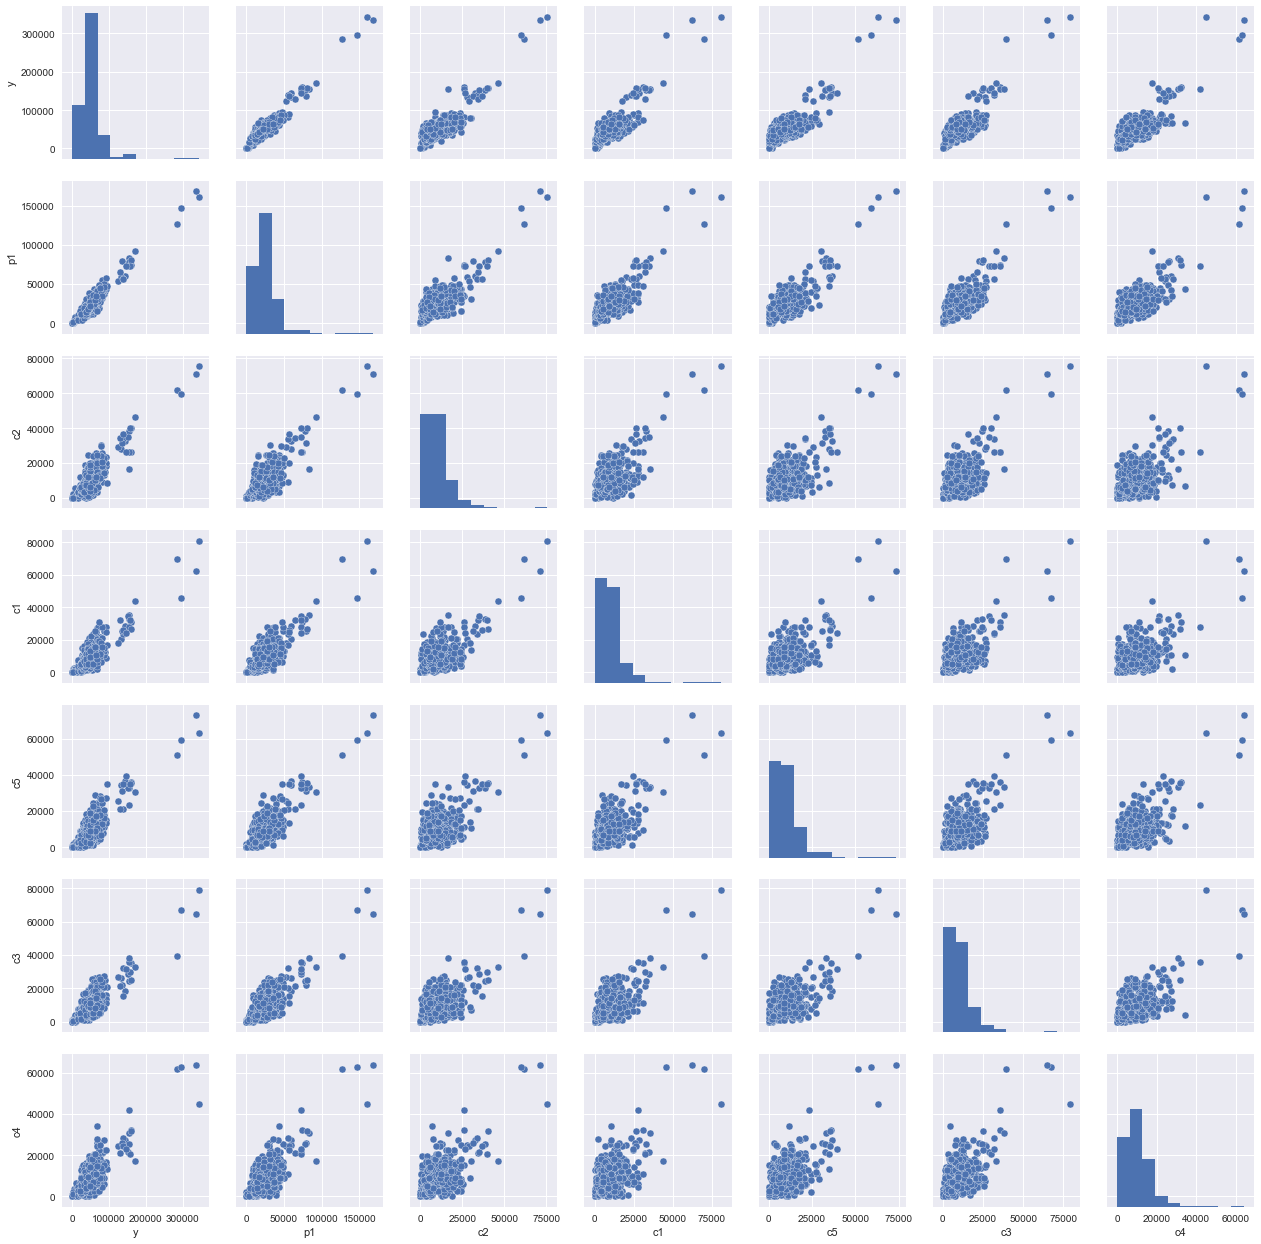

In [14]:
#scatterplot
sns.set()
cols = ['y', 'p1', 'c2', 'c1', 'c5', 'c3', 'c4']
sns.pairplot(df[cols], size = 2.5)
plt.show();

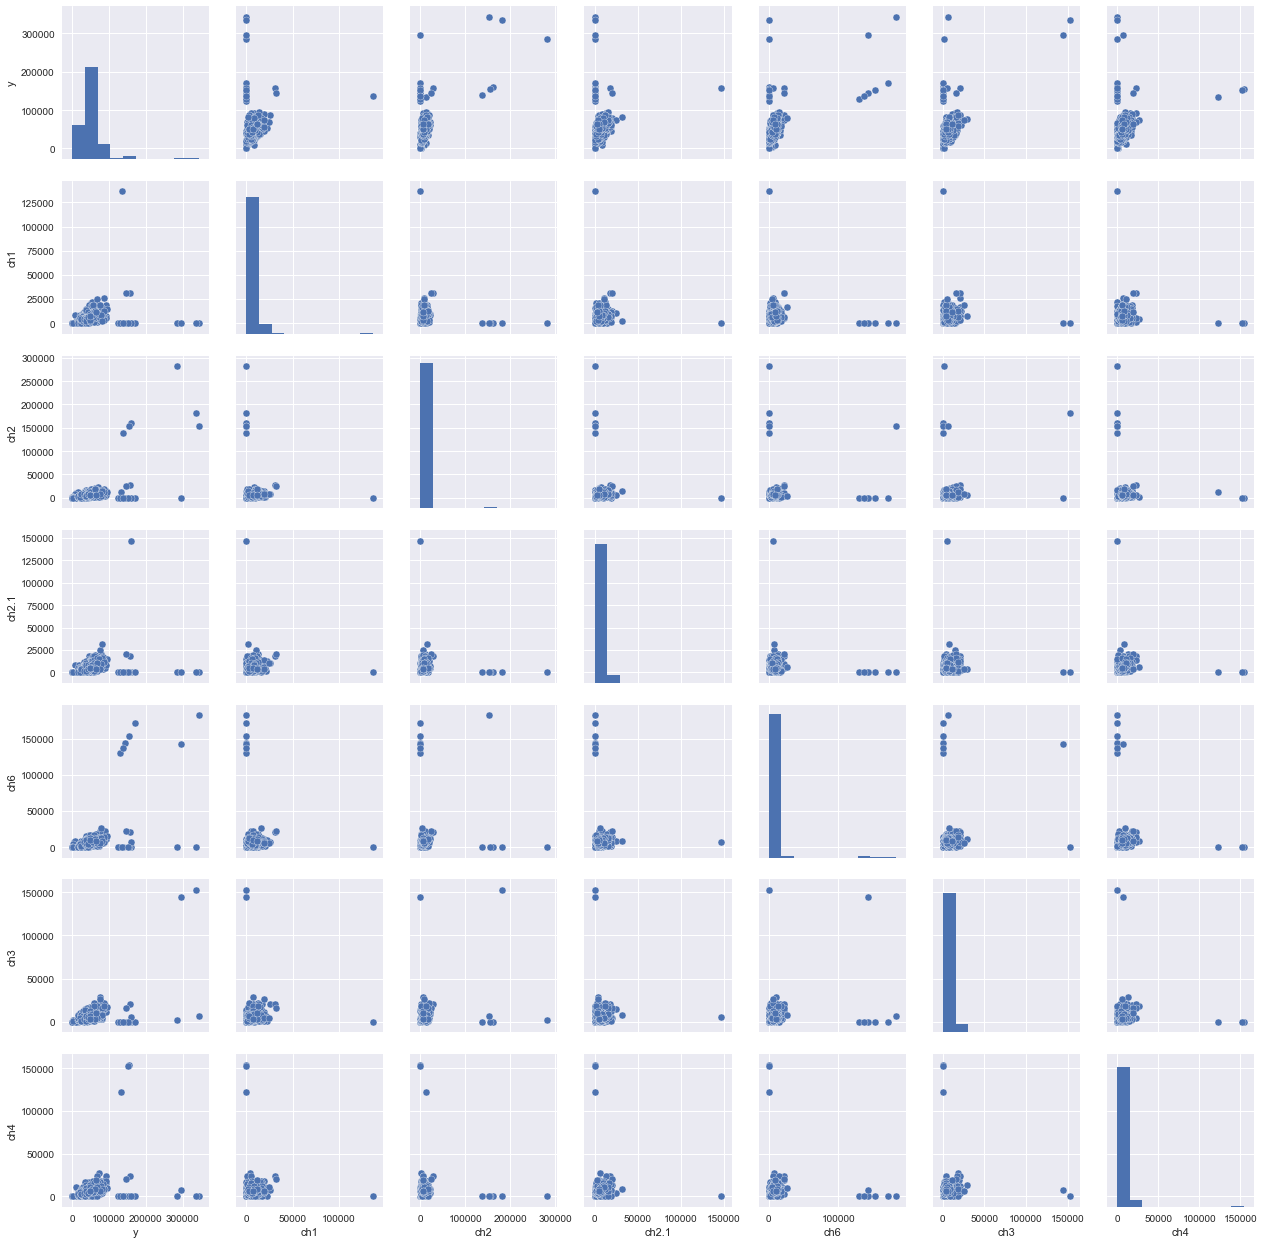

In [15]:
#scatterplot
sns.set()
cols = ['y', 'ch1', 'ch2', 'ch2.1', 'ch6', 'ch3', 'ch4']
sns.pairplot(df[cols], size = 2.5)
plt.show();

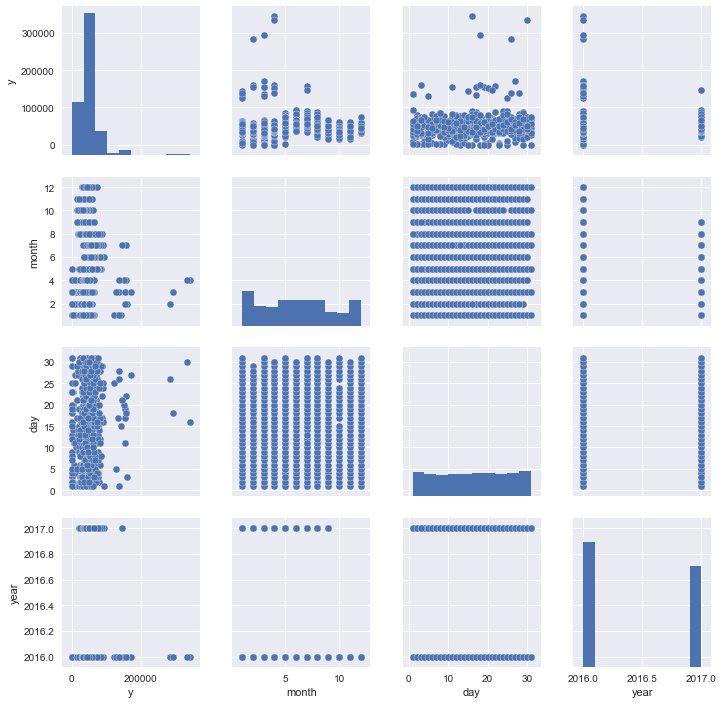

In [16]:
#scatterplot
sns.set()
cols = ['y', 'month','day','year']
sns.pairplot(df[cols], size = 2.5)
plt.show();

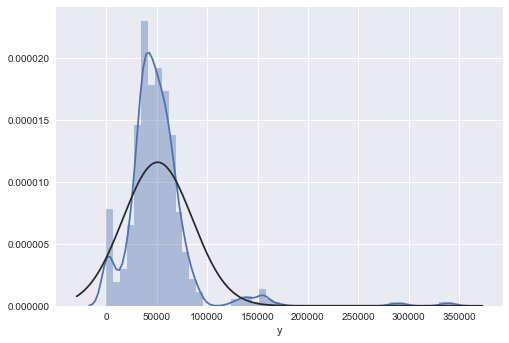

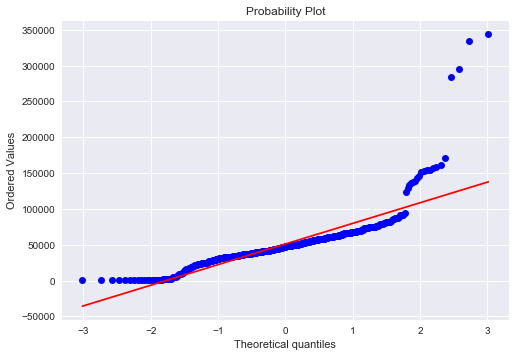

In [17]:
#histogram and normal probability plot
sns.distplot(df['y'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['y'], plot=plt)

In [18]:
df.head()

,p1,ch1,ch2,ch2.1,ch3,ch4,ch5,ch6,c1,c2,c3,c4,c5,day,month,year,y
0,1598,0,1678,0,0,0,0,0,0,0,0,1678,0,3,1,2016,1678
1,1700,0,4590,0,0,0,0,799,839,1120,840,2060,530,6,1,2016,5389
2,0,0,0,0,0,900,0,0,100,0,800,0,0,9,1,2016,900
3,4250,0,0,0,0,0,0,6410,2580,340,80,1730,1680,11,1,2016,6410
4,8374,0,0,8754,0,0,0,0,940,520,3196,4018,80,14,1,2016,8754


In [19]:
from scipy.stats import norm, skew #for some statistics
numeric_feats = df.dtypes.index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(17)


Skew in numerical features: 



,Skew
ch2.1,11.427275
ch3,10.894769
ch1,10.347488
ch4,10.207043
ch2,9.656855
ch5,9.254418
ch6,7.859178
y,3.918168
p1,3.300439
c1,3.081589


In [20]:
'''
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    df[feat] = boxcox1p(df[feat], lam)
'''    

'\nskewness = skewness[abs(skewness) > 0.75]\nprint("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))\n\nfrom scipy.special import boxcox1p\nskewed_features = skewness.index\nlam = 0.15\nfor feat in skewed_features:\n    \n    df[feat] = boxcox1p(df[feat], lam)\n'

In [21]:
from sklearn.model_selection import train_test_split
x,y = df.iloc[:,0:16].values, df.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

In [22]:
std= StandardScaler()
x_train_std= std.fit_transform(x_train)
x_test_std= std.fit_transform(x_test)
y_train_std= std.fit_transform(y_train)
y_test_std= std.fit_transform(y_test)

In [23]:
x_train_std_df= pd.DataFrame(x_train_std, columns=["p1","ch1","ch2","ch2.1","ch3","ch4","ch5","ch6","c1","c2","c3","c4","c5","day","month","year"])
x_train_std_df.head()

,p1,ch1,ch2,ch2.1,ch3,ch4,ch5,ch6,c1,c2,c3,c4,c5,day,month,year
0,0.298073,-0.020284,-0.395984,0.697105,0.005860,0.766168,0.210776,0.366028,-0.362847,0.326160,2.209274,-0.357778,-0.235481,-0.624053,0.269914,-0.893892
1,-0.435195,0.078397,0.710129,0.657156,-0.483433,-0.591172,-0.314075,0.003423,1.275680,-0.159423,-0.458169,0.609408,-0.487362,-0.734422,0.594155,-0.893892
2,-0.588459,-0.159187,0.373489,-0.269637,-0.296257,0.093148,-0.724078,-0.493285,-0.837323,-0.263072,-0.230073,0.220829,-0.879631,-1.617373,-0.702810,1.118703
3,-0.396281,-0.151819,0.183684,-0.032903,-0.352586,-0.302362,0.167790,-0.129937,-0.130373,-0.175091,-0.565233,0.551074,-0.357718,-1.065529,-0.378569,-0.893892
4,-0.645992,0.123449,-0.336734,-0.563165,-0.404257,0.592317,-0.013824,-0.438157,-0.986000,-0.829043,-0.591159,0.003056,0.124808,1.472954,1.242637,-0.893892


In [24]:
from sklearn.ensemble import RandomForestRegressor
#x_matrix = pd.get_dummies(x_train_std)
m_rf = RandomForestRegressor(n_estimators=17, max_depth=10, criterion= 'mse',random_state=1, n_jobs=-1)
model=m_rf.fit(x_train_std,y_train_std)

In [25]:
from sklearn.metrics import mean_squared_error
y_train_pred= model.predict(x_train_std)
y_test_pred= model.predict(x_test_std)
print("MSE train: %.3f, test: %.3f" %(mean_squared_error(y_train_std, y_train_pred), mean_squared_error(y_test_std, y_test_pred)))

MSE train: 0.009, test: 0.036


In [26]:
from sklearn.metrics import r2_score
print("R^2 train: %.3f, test: %.3f" %(r2_score(y_train_std, y_train_pred), r2_score(y_test_std, y_test_pred)))

R^2 train: 0.991, test: 0.964


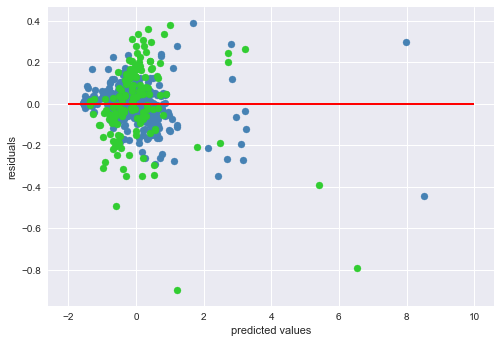

In [27]:
plt.scatter(y_train_pred, y_train_pred- y_train_std, c="steelblue", label= "Train data" )
plt.scatter(y_test_pred, y_test_pred- y_test_std, c="limegreen", label="Test data")
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.hlines(y=0, xmin=-2, xmax=10, lw=2, color="red")
plt.show()

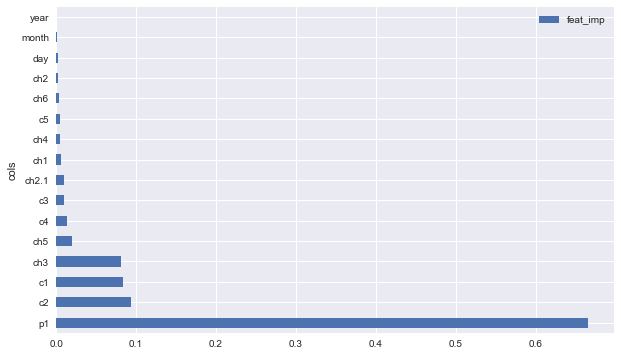

In [28]:
feature_imp = model.feature_importances_
feature_imp_df = pd.DataFrame({'cols':x_train_std_df.columns.values, 'feat_imp':feature_imp})
feature_imp_df.sort_values(by='feat_imp', ascending=False, inplace=True)
feature_imp_df[:17].plot.barh(x='cols', y='feat_imp',figsize=(10,6))

In [29]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, x_train_std, y_train_std, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test_std, y_test_std, scoring = scorer, cv = 10))
    return(rmse)

In [30]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV, LinearRegression
from sklearn.model_selection import cross_val_score



{'p1': 1.5301997193046602e-16, 'ch3': 0.098271825584172995, 'month': -4.8572257327350599e-17, 'ch1': 0.071496887423800948, 'ch2': 0.11033222191489644, 'ch2.1': 0.075875224295392452, 'ch4': 0.039738528687357208, 'ch5': 0.066094323389358722, 'ch6': 0.13941750569743488, 'year': 7.8062556418956319e-17, 'c3': 0.16951601505252251, 'c2': 0.18894105966365143, 'c1': 0.1625042818460562, 'day': 6.591949208711867e-17, 'c5': 0.18442786555755739, 'c4': 0.16824627553318067}
('RMSE on Training set :', 5.2245969935420737e-16)
('RMSE on Test set :', 6.7217826232387667e-16)


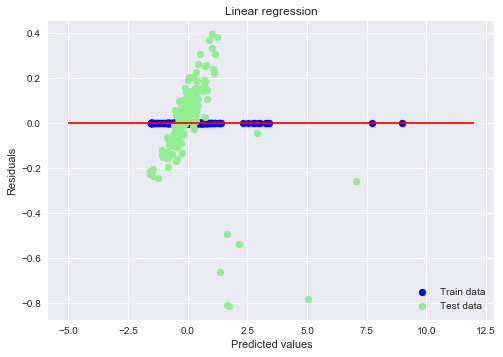

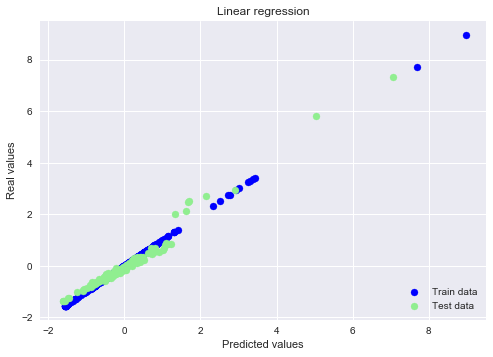

In [31]:
# Linear Regression
lr = LinearRegression()
model= lr.fit(x_train_std, y_train_std)
coefficients=dict(zip(x_train_std_df.columns, model.coef_))
print(coefficients)
# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(model).mean())
print("RMSE on Test set :", rmse_cv_test(model).mean())
y_train_pred = model.predict(x_train_std)
y_test_pred = model.predict(x_test_std)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train_std, c = "blue", label = "Train data")
plt.scatter(y_test_pred, y_test_pred - y_test_std, c = "lightgreen", label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc= "lower right")
plt.hlines(y = 0, xmin = -5, xmax = 12, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train_std, c = "blue", label = "Train data")
plt.scatter(y_test_pred, y_test_std, c = "lightgreen", label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "lower right")
plt.show()

('Best alpha :', 0.01)
Try again for more precision with alphas centered around 0.01
('Best alpha :', 0.0060000000000000001)
('Ridge RMSE on Training set :', 1.5045279909154239e-05)
('Ridge RMSE on Test set :', 6.5745279085432459e-05)


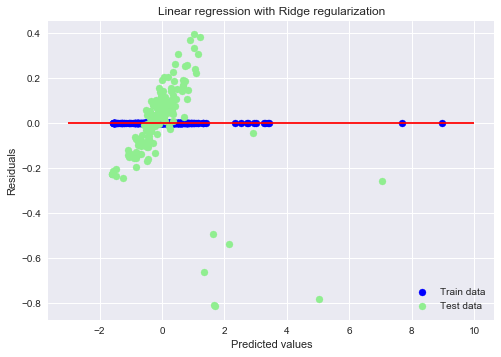

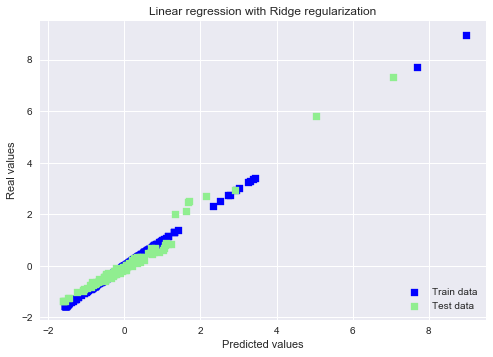

p1       3.569902e-05
ch1      7.149236e-02
ch2      1.103282e-01
ch2.1    7.587242e-02
ch3      9.826899e-02
ch4      3.973648e-02
ch5      6.609220e-02
ch6      1.394125e-01
c1       1.624980e-01
c2       1.889348e-01
c3       1.695086e-01
c4       1.682401e-01
c5       1.844211e-01
day      5.429142e-07
month    1.636470e-06
year     4.673708e-07
dtype: float64
Ridge picked 16 features and eliminated the other 0 features


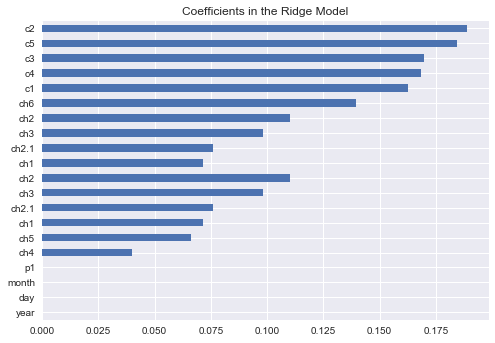

In [32]:
# Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x_train_std, y_train_std)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
model=ridge.fit(x_train_std, y_train_std)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(model).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(model).mean())
y_train_rdg = model.predict(x_train_std)
y_test_rdg = model.predict(x_test_std)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train_std, c = "blue", label = "Train data")
plt.scatter(y_test_rdg, y_test_rdg - y_test_std, c = "lightgreen", label = "Test data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = -3, xmax = 10, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train_std, c = "blue", marker = "s", label = "Train data")
plt.scatter(y_test_rdg, y_test_std, c = "lightgreen", marker = "s", label = "Test data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "lower right")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = x_train_std_df.columns)
print (coefs)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [39]:
alphas = [0.000009,0.006, 0.0008, 0.01, 0.03, 0.06, 0.1]
cv_ridge = [rmse_cv_train(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

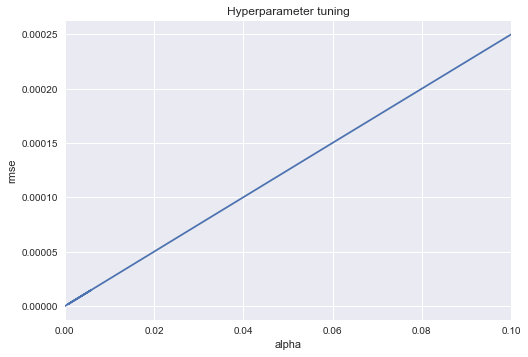

In [40]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Hyperparameter tuning")
plt.xlabel("alpha")
plt.ylabel("rmse")

('Best alpha :', 0.0001)
Try again for more precision with alphas centered around 0.0001
('Best alpha :', 6.0000000000000002e-05)
('Lasso RMSE on Training set :', 6.7202206666151448e-05)
('Lasso RMSE on Test set :', 0.00021888911892036916)


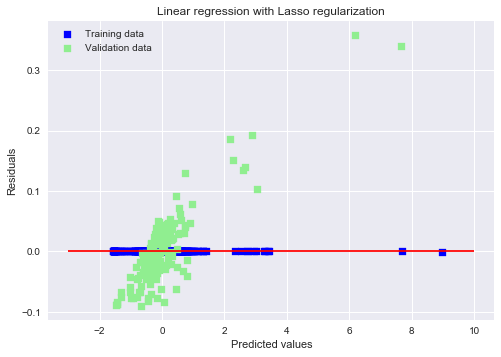

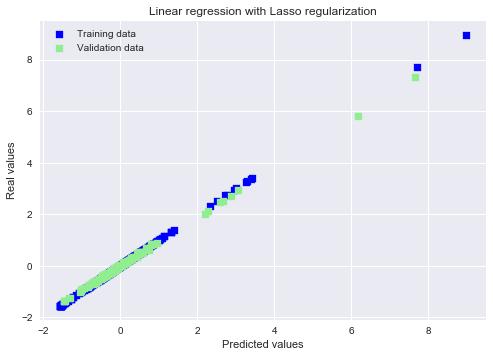

p1       0.000000
ch1      0.000000
ch2      0.000000
ch2.1    0.000000
ch3      0.000000
ch4      0.000000
ch5      0.000000
ch6      0.000000
c1       0.224101
c2       0.260597
c3       0.233798
c4       0.232042
c5       0.254334
day      0.000000
month   -0.000000
year     0.000000
dtype: float64
Lasso picked 5 features and eliminated the other 11 features


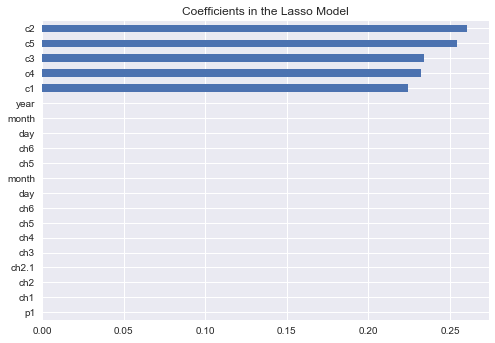

In [36]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,  0.3, 0.6, 1],
                max_iter = 50000, cv = 10)
lasso.fit(x_train_std, y_train_std)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
model= lasso.fit(x_train_std, y_train_std)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(model).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(model).mean())
y_train_las = model.predict(x_train_std)
y_test_las = model.predict(x_test_std)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train_std, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test_std, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -3, xmax = 10, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train_std, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_std, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")

plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = x_train_std_df.columns)
print (coefs)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()